#                    Intro to AI and Machine Learning M505 Group (C)
## Predicting Heart Failure Using Machine Learning

Muradov Abdulla                                                               GH1017889

#  Business Problem Understanding 


##  Introduction
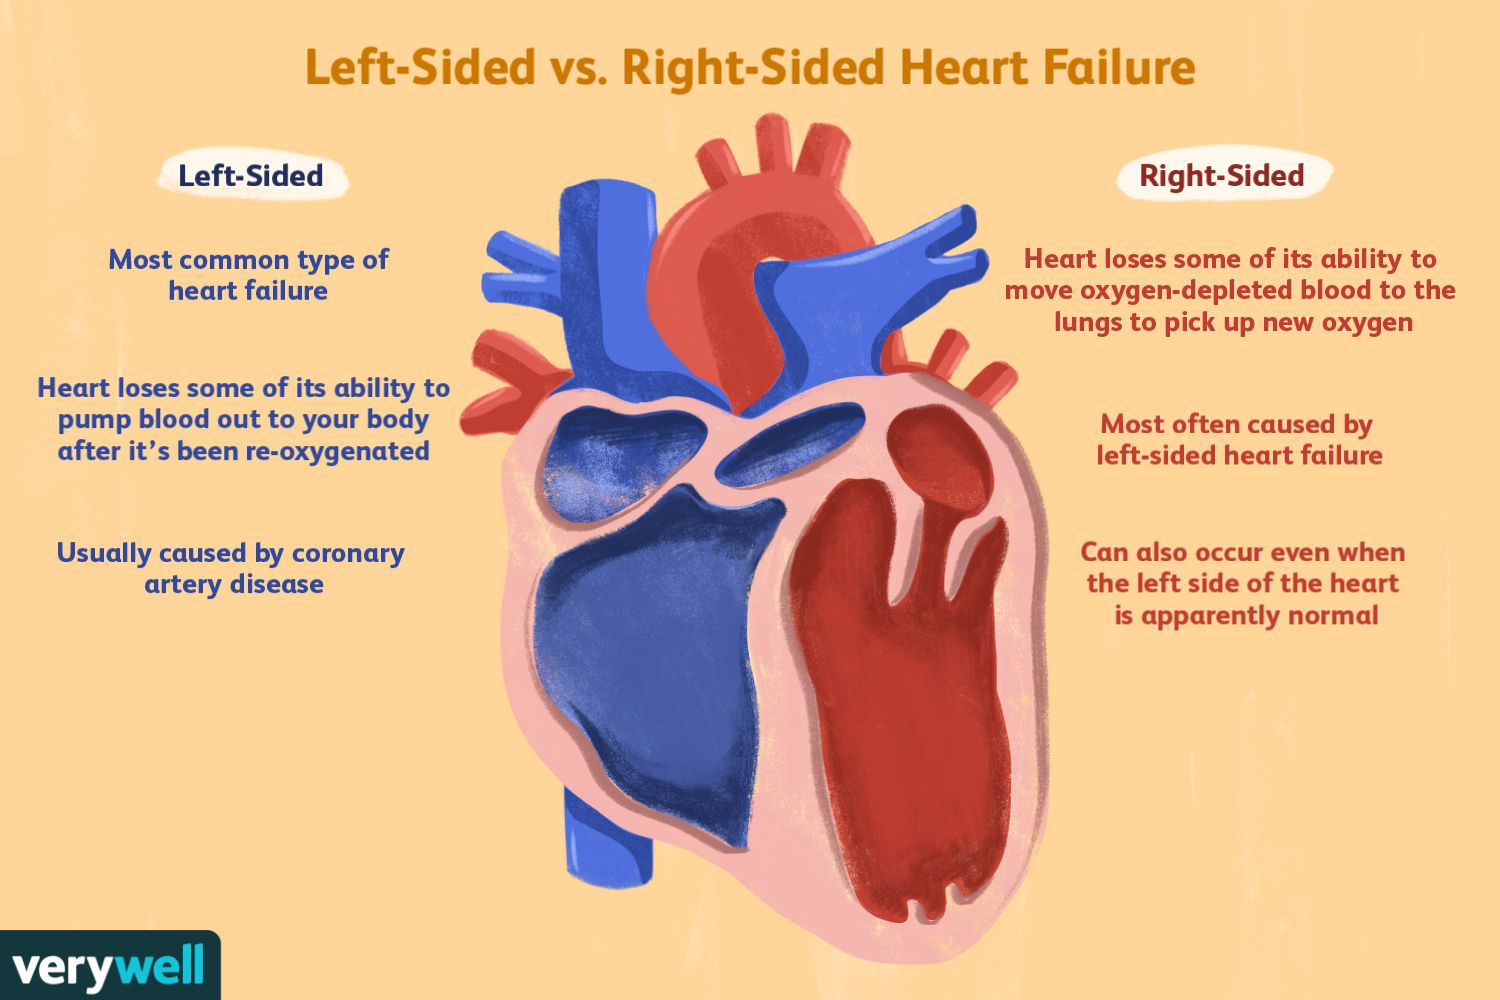

In a healthy heart, oxygen-rich blood is pumped from the left ventricle  through the body into the organs, supplying oxygen and nutrients to the organs.After feeding the organs, the oxygen-poor blood returns from the body to the right side of the heart,  where it is carried to the lungs. In the lungs, the blood is so rich in oxygen  that it can  be pumped back into the body through the left ventricle. 

Heart failure is the weakening of the pumping function of the heart. Usually, either the right side of the heart (right heart failure) or the left side of the heart (left heart failure) is affected. As heart failure progresses, both halves of the heart can be affected (global heart failure). Heart failure can also be chronic or acute in nature. Chronic heart failure is more common than sudden and unexpected acute heart failure. Acute heart failure can occur suddenly in the context of acute cardiovascular catastrophe and / or decompensation of heart failure. 

Cardiovascular disease is the world's leading cause of death, killing an estimated 17.9 million people each year and accounting for 31% of all deaths worldwide. 


### What is the aim of this notebook?

I was hired by a company that performs Stent placement and Angioplasty. In this notebook I will build a ML pipeline model that predicts "Heart Failure" according to the dataset that we have.

#  Data Collection

In [1]:
from google.colab import drive
drive.mount('/content/drive')                                                            

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install catboost

## Importing Libraries

In [18]:
import warnings
warnings.filterwarnings("ignore")                                              #Because we will use not Sckit Model

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from collections import Counter
from imblearn.over_sampling import SMOTE

## Loading the dataset

In [6]:

df = pd.read_csv ("heart_failure_clinical_records_dataset.csv")
df = df.set_index("age")
df 



,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,,,,,,,,,,,,
75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0


## Data Overview

Age: Age of the patient in years

Anaemia: Desease that occurs because of low hemoglobin or lack of red cells (0:Reduced or 1:Normal)

creatinine_phosphokinase: It is a phosphocreatine kinase in our dataset it is level in blood measured in (mcg/L)

Diabetes: Desease that caused by high level of sugar in the blood. In our dataset if the patient has it (0:No or 1:Yes)

ejection_fraction: Percentage of blood leaving the heart at each contraction (percentage)

high_blood_pressure: It is a medical termin called hypertension. In our dataset if the patient has it  (0:No or 1:Yes)

platelets: Platelets are very large cells in the bone of a human. In our dataset measured in  (kiloplatelets/mL)

serum_creatinine: It is a diagnostic test to evaluate performance of kidneys. In our dataset measured in  (mg/dL)

serum_sodium: An amount of sodium in patients blood. In our dataset measured in  (mEq/L)

sex: Biological sex of the patient (0:Female or 1:Male)

smoking: If the patient is a smoker (0:No or 1: Yes)

time: It is amount of visits that patient performed in months 

death_event: If the patient with according results survived or not. (0:No or 1:Yes )



As we can understand from 'Data Overview' all columns that we have are the complex reasons according to which 'Death Event' has value '0' or '1'.  
  
In this pipeline 'Death Event' is going to be my target label and I will analyze other columns to understand how they can affect my results. I will be checking null values, identifying data types and separating it to 'Train' and 'Test' sets 

## Checking Null Values

In [5]:
print(df.isnull().sum())

anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


The data that we are using has no null values.

## Getting more detailed look

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 299 entries, 75.0 to 50.0
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   anaemia                   299 non-null    int64  
 1   creatinine_phosphokinase  299 non-null    int64  
 2   diabetes                  299 non-null    int64  
 3   ejection_fraction         299 non-null    int64  
 4   high_blood_pressure       299 non-null    int64  
 5   platelets                 299 non-null    float64
 6   serum_creatinine          299 non-null    float64
 7   serum_sodium              299 non-null    int64  
 8   sex                       299 non-null    int64  
 9   smoking                   299 non-null    int64  
 10  time                      299 non-null    int64  
 11  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 30.4 KB


By running this code I took a detailed look on a count of null values and understood data types that we have :
#dtypes: float64(2), int64(10)

In addition, the dataset that I am using has no categorical values.



## Splitting data into 'Train' and 'Test' datasets

In [11]:

df_train, df_test = train_test_split(df, random_state=2)
print("df_train:", df_train.shape)
print("df_test:", df_test.shape)
print("Test and Train Datasets are ready")

df_train: (224, 12)
df_test: (75, 12)
Test and Train Datasets are ready


First of all, I decided to split 'Training' and 'Test' datasets in order to not touch 'Test' dataset consequently to not affect prediction results. 

In some cases, it is necessary to work with 'Test' dataset as well like to clean null values or to drop some unnecessary columns, however in my case all columns are relevant and my dataset looks clean.

First, I divided my dataset to 'df_train' and 'df_test' to explain splitting process more precisely. I set a random state in order to reproduce my problem the same way every time it runs. 

### Dropping the Target Label

In [12]:

X_train = df_train.drop('DEATH_EVENT',axis=1)
Y_train = df_train['DEATH_EVENT']

X_Test = df_test.drop('DEATH_EVENT',axis=1)
Y_Test = df_test['DEATH_EVENT']

print(X_train)
print(Y_train)

      anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
age                                                                    
72.0        1                       943         0                 25   
49.0        0                       972         1                 35   
55.0        1                      2794         0                 35   
75.0        0                       582         1                 30   
50.0        1                      1051         1                 30   
...       ...                       ...       ...                ...   
60.0        1                        47         0                 20   
68.0        1                       220         0                 35   
85.0        0                      5882         0                 35   
82.0        1                       379         0                 50   
65.0        0                       582         1                 40   

      high_blood_pressure  platelets  serum_creatinine  serum_s

In this section I divided 'df_train' and 'df_test' to 'x' and 'y' variables.

#  Data Exploration

## Checking the correlation

In [19]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
anaemia,1.00,-0.19,-0.01,0.03,0.04,-0.04,0.05,0.04,-0.09,-0.11,-0.14,0.07
creatinine_phosphokinase,-0.19,1.00,-0.01,-0.04,-0.07,0.02,-0.02,0.06,0.08,0.00,-0.01,0.06
diabetes,-0.01,-0.01,1.00,-0.00,-0.01,0.09,-0.05,-0.09,-0.16,-0.15,0.03,-0.00
ejection_fraction,0.03,-0.04,-0.00,1.00,0.02,0.07,-0.01,0.18,-0.15,-0.07,0.04,-0.27
high_blood_pressure,0.04,-0.07,-0.01,0.02,1.00,0.05,-0.00,0.04,-0.10,-0.06,-0.20,0.08
platelets,-0.04,0.02,0.09,0.07,0.05,1.00,-0.04,0.06,-0.13,0.03,0.01,-0.05
serum_creatinine,0.05,-0.02,-0.05,-0.01,-0.00,-0.04,1.00,-0.19,0.01,-0.03,-0.15,0.29
serum_sodium,0.04,0.06,-0.09,0.18,0.04,0.06,-0.19,1.00,-0.03,0.00,0.09,-0.20
sex,-0.09,0.08,-0.16,-0.15,-0.10,-0.13,0.01,-0.03,1.00,0.45,-0.02,-0.00
smoking,-0.11,0.00,-0.15,-0.07,-0.06,0.03,-0.03,0.00,0.45,1.00,-0.02,-0.01


I made a correlation between columns using a 'heatmap'. Heatmap is a tool used to visualize 2-dimensional format data using color variance. Color variations help to understand the magnitude better than visually analyzing each column and checking the relations by comparing them. 

### Checking correlation with Target

In [10]:
corr = df.corr()
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

The main reason I used a heatmap is to understand correlation of other columns with my Target Label.  
  
By running this code, we can see the columns that has more relations to the 'Death Event' column. They might interact with Target and lower the performance; thus, I will try results after dropping the most related ones. 

### Visualazing most correlated columns

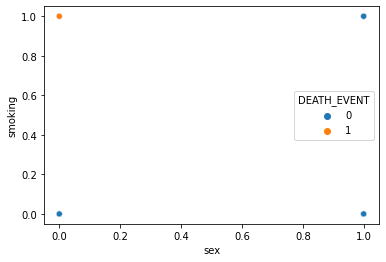

In [11]:
sns.scatterplot(data=df, x='sex', y='smoking', hue='DEATH_EVENT')
plt.show()

As I mentioned before other columns might have a stronger correlation as column 'sex' and 'smoking' for example, however we do not need to do anything about it because they are not correlated with Target.

## Plot histogram to represent the distribution of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f933dc061d0>,
      dtype=object)

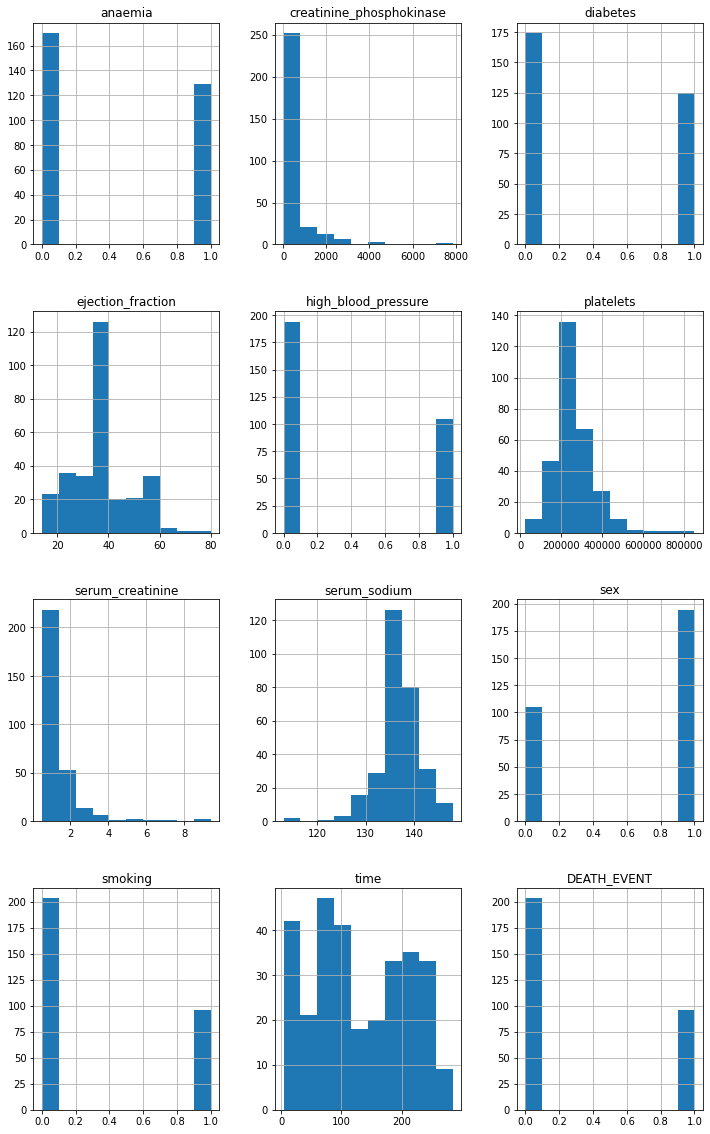

In [12]:
fig = plt.figure(figsize = (12,20))
ax = fig.gca()
df.hist(ax = ax)

### Plot graph count values of each classes on target colunms

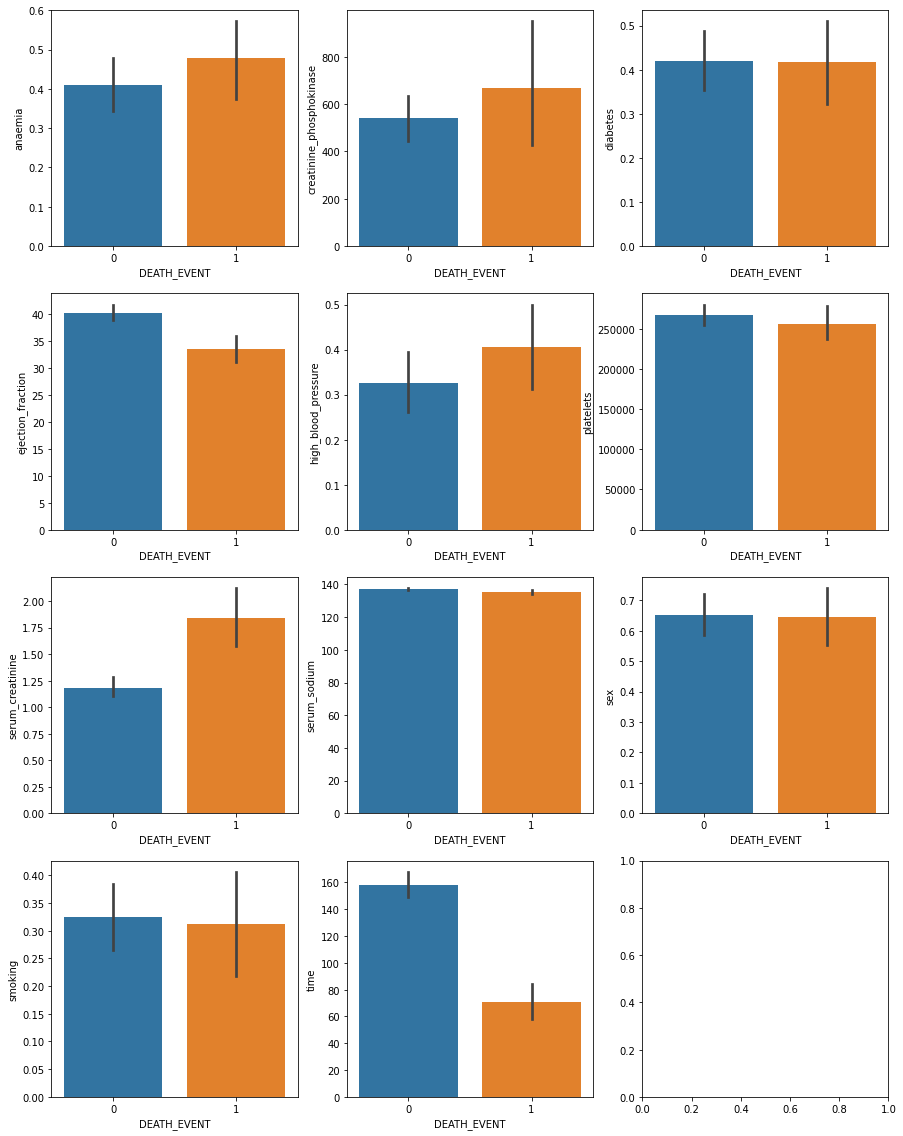

In [13]:
fig, ax = plt.subplots(4,3, figsize = (15,20))
sns.barplot(data = df, y ="anaemia", x="DEATH_EVENT", ax=ax[0,0])
sns.barplot(data = df, y ="creatinine_phosphokinase", x="DEATH_EVENT", ax=ax[0,1])
sns.barplot(data = df, y ="diabetes", x="DEATH_EVENT", ax=ax[0,2])
sns.barplot(data = df, y ="ejection_fraction", x="DEATH_EVENT", ax=ax[1,0])
sns.barplot(data = df, y ="high_blood_pressure", x="DEATH_EVENT", ax=ax[1,1])
sns.barplot(data = df, y ="platelets", x="DEATH_EVENT", ax=ax[1,2])
sns.barplot(data = df, y ="serum_creatinine", x="DEATH_EVENT", ax=ax[2,0])
sns.barplot(data = df, y ="serum_sodium", x="DEATH_EVENT", ax=ax[2,1])
sns.barplot(data = df, y ="sex", x="DEATH_EVENT", ax=ax[2,2])
sns.barplot(data = df, y ="smoking", x="DEATH_EVENT", ax=ax[3,0])
sns.barplot(data = df, y ="time", x="DEATH_EVENT", ax=ax[3,1])

## Outliers Detection

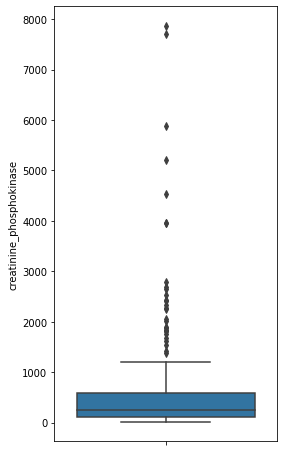

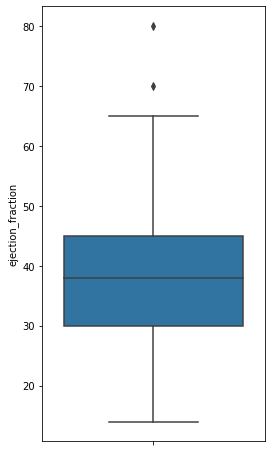

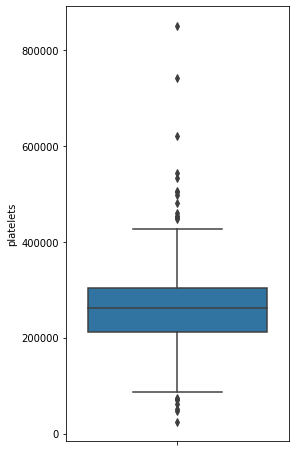

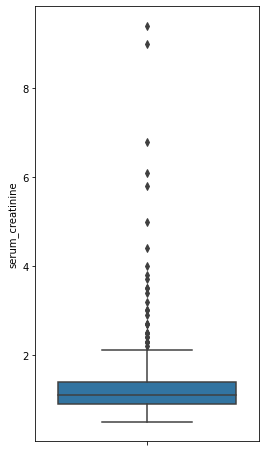

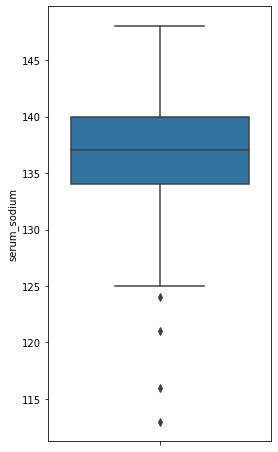

In [14]:

plt.figure(figsize = (4,8))
sns.boxplot(y = df.creatinine_phosphokinase) 

plt.figure(figsize = (4,8))
sns.boxplot(y = df.ejection_fraction)

plt.figure(figsize = (4,8))
sns.boxplot(y = df.platelets)

plt.figure(figsize = (4,8))
sns.boxplot(y = df.serum_creatinine)

plt.figure(figsize = (4,8))
sns.boxplot(y = df.serum_sodium)





I plot 4 columns to visualize outliers. Lower and Upper skirts that we see in our graph shows us minimum and maximum mean values range. 

Data points that we see below and above those skirts are outliers. 

However not everything that falls within a range is an outlier. All the values that we have in those columns are real life data points which were recorded from patients. They help us to predict our 'Target Label'. Let's take a look at the most obvious outlier in 'Platelets' column that looks completely unnecessary, however patients with kidney disfunction may have this result. For this reason, I decided to keep all outliers. 

# 4. Feature Engineering

## Checking Imbalanced Data

<AxesSubplot:>

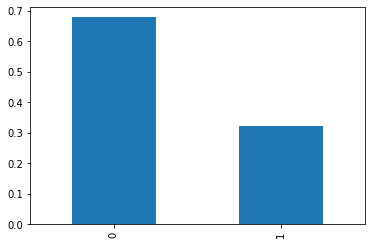

In [8]:

df["DEATH_EVENT"].value_counts(normalize=True).plot(kind='bar')

As we can see classes in our target label are imbalanced. I decided not to plot all the columns with imbalanced classes that have '0' and '1' values such as 'smoking', 'sex', 'diabetes', however I will print the shape of resampled ‘x’ and ‘y’ to show the difference. The main question is why Oversampling?

The answer is because there are 2 techniques to deal with imbalanced classes : 'Oversampling' and 'Undersampling'.

In my case my dataset consists of 12 columns and 299 rows and decreasing number of samples may lead to low performance, thus I decided to oversample the classes. 

### Value Count Before Oversampling 

In [16]:

unique,count = np.unique(Y_train,return_counts=True)
Y_train_count = (unique,count)
Y_train_count


(array([0, 1]), array([149,  75]))

To explain imbalance between '0' and '1' classes in our Target Label I decided to apply 'count' function to see the count of variables in each class. I will use 'count' function after Oversampling as well to show the difference.

### Oversampling Using SMOTE

In [14]:

sm = SMOTE()
X_train_resampled,Y_train_resampled = sm.fit_resample(X_train, Y_train)
print("Smote Oversampled")


Smote Oversampled


First of all, we have to understand how Smote works. By using 'Smote' method we simply add artificial rows to our dataset to deal with class imbalances. It might not be useful in our case because we might have inconsistence between actual 'Y' and 'Y' predicted. I will check it in further steps. 

### Value Count After Oversampling 

In [18]:
unique,count=np.unique(Y_train_resampled,return_counts=True)
Y_train_resampled_smote_value_count = (unique,count)
Y_train_resampled_smote_value_count

(array([0, 1]), array([149, 149]))

After using the count I can see that classes in my target label are balanced.

### Printing Shape

In [19]:
print(X_train_resampled)

     anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0          1                       943         0                 25   
1          0                       972         1                 35   
2          1                      2794         0                 35   
3          0                       582         1                 30   
4          1                      1051         1                 30   
..       ...                       ...       ...                ...   
293        0                        98         0                 47   
294        1                       410         0                 17   
295        0                       441         0                 28   
296        1                       863         0                 27   
297        1                       121         0                 30   

     high_blood_pressure      platelets  serum_creatinine  serum_sodium  sex  \
0                      1  338000.000000          1.700000          

X_train_resampled has more rows of artificial data now. Before Smote I had 299 rows in my dataset.

# Data Scaling

In [15]:
std = StandardScaler()
X_train_resampled = std.fit_transform(X_train_resampled)
X_Test = std.transform(X_Test)

print("Data has been scaled")


Data has been scaled


I scaled the data in order to put all the values within a range of '0' and '1'.Data needs to be scaled when using methods based on measures of how far apart data points, like support vector machines, or SVM or k-nearest neighbors, or KNN and etc.

# Model Training

Before I start Model Training, I need to clarify that the dataset that I use requires Classification methods, because we need to classify the Target 'Death Event' into '0' and '1'.  
  
I use precision as a scoring method because I need to understand how precise my model is predicting both classes. In addition, I will use a cross validation and 'cv' is a number of cross validation model has to try for each hyperparameters. 

## KNN

In [21]:
parameters_grid = {
    "n_neighbors": [11, 33, 55, 77, 99, 111], 
    "metric": ["minkowski","manhattan", "euclidean"]
}
model_1 = sklearn.model_selection.GridSearchCV(sklearn.neighbors.KNeighborsClassifier(),
                                               parameters_grid, scoring="precision", cv=5)
model_1.fit(X_train_resampled, Y_train_resampled)
print("Precision of best KNN classfier = {:.2f}".format(model_1.best_score_))
print("Best found hyperparameters of KNN classifier = {}".format(model_1.best_params_))

Precision of best KNN classfier = 0.79
Best found hyperparameters of KNN classifier = {'metric': 'manhattan', 'n_neighbors': 11}


I decided to use grid parameters for KNN  and to check the score with the hyperparameters that I set. For this reason I will use 'Grid Search' to get the best hyperparameters.More detailed about KNN:
The nearest neighbor algorithm, often abbreviated as knn, is a data classification approach that estimates the probability that a data point will be a member of one or another group, depending on which group the data point is closest to.

The Nearest Neighbor Method is an example of the "lazy learner" algorithm.
That is, do not build a model using the training set until the dataset is requested.

More about hyperparameters :      
n_neighbors = Number of data points we want to take as a neighbouring ones. For example : If we set this parameter to '3', it means that the alghoritm will analyse 3 nearest neigbours and as we increase number of neighbouring points it checks more points.

metric = Metrics that we want to you use as our hyperparameter.
In my case I used 

"minkowski" - The default metric of KNN.

"manhattan" and 

"euclidean"


## SVM

In [22]:
parameters_grid = {
    "kernel": ["linear", "poly"], 
    "C": [0.01, 1, 10]
}
model_2 = sklearn.model_selection.GridSearchCV(sklearn.svm.SVC(), parameters_grid, scoring = "precision", cv=4)
model_2.fit(X_train_resampled, Y_train_resampled)
print("Precision of best SVM classfier = {:.2f}".format(model_2.best_score_))
print("Best found hyperparameters of SVM classifier = {}".format(model_2.best_params_))

Precision of best SVM classfier = 0.78
Best found hyperparameters of SVM classifier = {'C': 1, 'kernel': 'linear'}


More detailed about Support Vector Machine :

This is a set of similar "supervised learning" type algorithms used for classification and regression analysis tasks. This method belongs to a family of linear classifiers. The main idea of the support vector method is to transform the original vector into a higher dimensional space and find the separated hyperplane with the largest gap in this space. Two parallel hyperplanes are constructed on either side of the hyperplane that separates the classes.

More about hyperparameters :     
"kernel" = Kernel functions are a  machine learning method that can transform an element into a new linear separable space when it is not linearly separable. Such a space is called a correction space. All consistent samples have a larger dimension of corresponding space, so the main problem is finding it.
For this reason I chose 
"linear" kernel
and
"poly"

In order to find the best match between them. Another hyperparameter is :

"C" = The C parameter tells  SVM optimization how much  to avoid misclassification of each training sample. For large C values, the optimizer chooses a  hyperplane with a small margin if the hyperplane is good at classifying all  training points  correctly. Conversely, if the value of C is very small, the optimizer will look for a larger margin to separate the hyperplane, even if the hyperplane misclassifies more points. If the value of C is very small, you need to get a misclassified example, even if the training data is linearly separable.



## Decision Tree

In [26]:
parameters_grid = {
    "criterion": ["gini", "entropy"], 
    "max_depth": range(11, 55, 77),
    "min_samples_split": range(5, 10, 20)
 
}
model_3 = sklearn.model_selection.GridSearchCV(sklearn.tree.DecisionTreeClassifier(), 
                                               parameters_grid, scoring="precision", cv=5)
model_3.fit(X_train_resampled, Y_train_resampled)
print("Precision of best decision tree classfier = {:.2f}".format(model_3.best_score_))
print("Best found hyperparameters of decision tree classfier = {}".format(model_3.best_params_))

Precision of best decision tree classfier = 0.76
Best found hyperparameters of decision tree classfier = {'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 5}


More detailed about Decision Tree Clasifier :    
A decision tree is a classifier built on the basis of "if, then" decision rules  arranged in a tree-like hierarchy. 
The decision tree is based on the process of recursively splitting an initial set of objects into a subset associated with a predefined class. Partitioning is done using decision rules that check attribute values according to specific criteria.They are built on supervised learning. A set of observations with predefined class labels is used as the training dataset. 

More detailed about Hyperparameters :     
"criterion" = Quality of split in Decision Tree Alghiritm is one of the most important factors. Criterion basically measures quality of a split in a Decision Tree Classifier. Default is 'giny'

"max_depth" = It is a maximum depth of the tree. If this isn't certain withinside the Decision Tree, the nodes can be improved till all leaf nodes are natural or till all leaf nodes include much less than min_samples_split. 

"min_samples_split" =  Is the minimum amount of samples that is required to split the node. If the sample size of  an internal node is smaller than  min_samples_split, then that node is a leaf node.


## CatBoost

In [31]:

parameters_grid = {
    "max_leaves": [16,32,64], 
    "learning_rate": [0.01, 0.1] 
}
model_4 = sklearn.model_selection.GridSearchCV(CatBoostClassifier(verbose=0), parameters_grid, scoring="precision", cv=5)
model_4.fit(X_train_resampled, Y_train_resampled)
print("Precision of best decision tree classfier = {:.2f}".format(model_4.best_score_))
print("Best found hyperparameters of decision tree classfier = {}".format(model_4.best_params_)) 


Precision of best decision tree classfier = 0.86
Best found hyperparameters of decision tree classfier = {'learning_rate': 0.01, 'max_leaves': 64}


More detailed about Hyperparameters:     
"Learning_Rate" = It affects the total training time.  
The lower the value, the more iterations required for training. For this reason, we have to choose a value based on our performance expectations. I will provide more detailed explanation of CatBoost Model in Model Assessment part. 

# Model Assesment

Now lets print a confusion matrix of all models to understand the score for both of the classes 

Now a little about Confusion Matrix : 

The confusion matrix is a way of summarizing the work of a classification algorithm. If each class has an odd number of observations, or if the dataset contains more than one class, the accuracy of the classification alone can be misleading. Computing the 
confusion matrix gives you a better idea of what the classification model is doing correctly and what error it is causing.  

## Using KNN

In [39]:
Y_predicted = model_1.predict(X_Test)
precision = sklearn.metrics.precision_score(Y_Test, Y_predicted)
cm = sklearn.metrics.confusion_matrix(Y_Test, Y_predicted)
precision, recall, f1, support = sklearn.metrics.precision_recall_fscore_support(Y_Test, Y_predicted) 
print("Accuracy =", accuracy)
print("Precision =", precision)
print("Recall =", recall)
print("F1-Score =", f1)
print("Confusion Matrix:\n", cm)

Precision = [0.83928571 0.63157895]
Recall = [0.87037037 0.57142857]
F1-Score = [0.85454545 0.6       ]
Confusion Matrix:
 [[47  7]
 [ 9 12]]


## Using SVM

In [40]:
Y_predicted = model_2.predict(X_Test)
precision = sklearn.metrics.precision_score(Y_Test, Y_predicted)
cm = sklearn.metrics.confusion_matrix(Y_Test, Y_predicted)
precision, recall, f1, support = sklearn.metrics.precision_recall_fscore_support(Y_Test, Y_predicted)
print("Precision =", precision)
print("Recall =", recall)
print("F1-Score =", f1)
print("Confusion Matrix:\n", cm)

Precision = [0.8627451  0.58333333]
Recall = [0.81481481 0.66666667]
F1-Score = [0.83809524 0.62222222]
Confusion Matrix:
 [[44 10]
 [ 7 14]]


## Using Decision Tree

In [41]:
Y_predicted = model_3.predict(X_Test)
precision = sklearn.metrics.precision_score(Y_Test, Y_predicted)
cm = sklearn.metrics.confusion_matrix(Y_Test, Y_predicted)
precision, recall, f1, support = sklearn.metrics.precision_recall_fscore_support(Y_Test, Y_predicted)
print("Precision =", precision)
print("Recall =", recall)
print("F1-Score =", f1)
print("Confusion Matrix:\n", cm)

Precision = [0.86792453 0.63636364]
Recall = [0.85185185 0.66666667]
F1-Score = [0.85981308 0.65116279]
Confusion Matrix:
 [[46  8]
 [ 7 14]]


## Using CatBoost

In [42]:
Y_predicted = model_4.predict(X_Test)
precision = sklearn.metrics.precision_score(Y_Test, Y_predicted)
cm = sklearn.metrics.confusion_matrix(Y_Test, Y_predicted)
precision, recall, f1, support = sklearn.metrics.precision_recall_fscore_support(Y_Test, Y_predicted)
print("Precision =", precision)
print("Recall =", recall)
print("F1-Score =", f1)
print("Confusion Matrix:\n", cm)

Precision = [0.94545455 0.9       ]
Recall = [0.96296296 0.85714286]
F1-Score = [0.95412844 0.87804878]
Confusion Matrix:
 [[52  2]
 [ 3 18]]


Now we can see that model 4  'CatBoost Classifier' has the best score overall. Now what is CatBoost Classifier?

CatBoost is an open source machine learning library created by the Russian search giant Yandex in 2017, and is a variation of the Boosting algorithm family. CatBoost, Boost, and Light GBL are collectively known as the three main GBTD artifacts, which are improved implementations within the GBTD XGBoost algorithm widely used in the industry. LightGBM effectively increases the efficiency of GBDT calculations. Yandex CatBoost is known as a better algorithm than Boost and Light GBL in terms of algorithm accuracy. 

Why Catboost?

After trying XGBoost I decided to try a Catboost and got better results. Catboost is a simply more developed version of XGBoost alghoritm which I tried before and had not bad scores.




## Visualisation of Final Confusion Matrix 

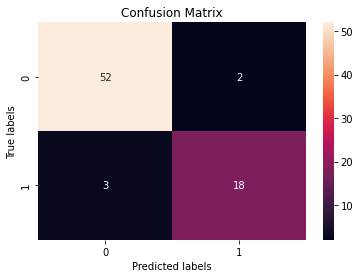

In [37]:
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1']); ax.yaxis.set_ticklabels(['0','1']);


In [38]:
target_names = ['0','1']
print("Report model\n")
print(sklearn.metrics.classification_report(Y_Test, Y_predicted, target_names=target_names))

Report model

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.90      0.86      0.88        21

    accuracy                           0.93        75
   macro avg       0.92      0.91      0.92        75
weighted avg       0.93      0.93      0.93        75



# Conclusion

After trying four different models I can conclude that 'CatBoostClassifier' had the best performance overall. During the studies I tried other models that I did not include to this work such as: 
XGBoost Classifier and Naive Bayes, however after printing the confusion matrix results I noticed lack of precision in both classes. As we can see from confusion matrixes of other models that I used, imbalanced precision was the main problem that I had. XGBoost Classifier had really similar scores as well and as I mentioned before that was the main reason why I used CatBoost. 
  
Morover studies showed that when not taking into account 'serum_creatinine' column overall performance of Model raise

- Without serum_creatinine column
              
     
     Precision  97 91
     
     Recall    96  89
     
     F-1 Score 96  93